In [1]:
# Brian Chan
# June 2021

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Returns the dataframes that represent the line graphs for the record highs and lows
# (tmax and tmin) and the scatterplot for the daily highs and lows (tmax_last and tmin_last).
# The parameter year represents the selected year. Division by 10 is performed since
# the data is recorded in tenths of a degree (centigrade).

def produce_dataframes(df, year):
    
    df.sort_values('Date', inplace=True)

    tmin = df.loc[df['Element'] == 'TMIN']
    tmin = tmin.drop(['ID', 'Element'], axis=1)

    tmin_last = tmin[pd.DatetimeIndex(tmin['Date']).year == year]
    tmin_last = tmin_last.groupby('Date').agg('min')
    tmin_last = tmin_last / 10

    tmin = tmin[pd.DatetimeIndex(tmin['Date']).year < year]
    tmin = tmin.groupby('Date').agg('min')
    tmin = tmin / 10

    tmax = df.loc[df['Element'] == 'TMAX']
    tmax = tmax.drop(['ID', 'Element'], axis=1)

    tmax_last = tmax[pd.DatetimeIndex(tmax['Date']).year == year]
    tmax_last = tmax_last.groupby('Date').agg('max')
    tmax_last = tmax_last / 10

    tmax = tmax[pd.DatetimeIndex(tmax['Date']).year < year]
    tmax = tmax.groupby('Date').agg('max')
    tmax = tmax / 10
    
    return compress(tmax, tmin, tmax_last, tmin_last)

In [3]:
# Performs the heavy-lifting for produce_dataframes. Specifically, it calculates the record 
# highs and lows from the daily highs and lows and it determines what should be included in the 
# scatterplot. Observations for leap days (Feb 29) are removed before the above calculations
# take place.

def compress(tmax, tmin, tmax_last, tmin_last):

    if year > 2008:
        tmin = tmin.drop('2008-02-29', axis=0)
        tmax = tmax.drop('2008-02-29', axis=0)

    if year > 2012:
        tmin = tmin.drop('2012-02-29', axis=0)
        tmax = tmax.drop('2012-02-29', axis=0)
  
    if year == 2008:
        tmin_last = tmin_last.drop('2008-02-29', axis=0)
        tmax_last = tmax_last.drop('2008-02-29', axis=0)

    if year == 2012:
        tmin_last = tmin_last.drop('2012-02-29', axis=0)
        tmax_last = tmax_last.drop('2012-02-29', axis=0)        

    tmin.index = pd.DatetimeIndex(tmin.index).strftime('%m-%d')
    tmin = tmin.groupby(tmin.index).min()

    tmax.index = pd.DatetimeIndex(tmax.index).strftime('%m-%d')
    tmax = tmax.groupby(tmax.index).max()

    tmin_last.index = pd.DatetimeIndex(tmin_last.index).strftime('%m-%d')
    tmin_last = tmin_last[tmin_last['Data_Value'] < tmin['Data_Value']]

    tmax_last.index = pd.DatetimeIndex(tmax_last.index).strftime('%m-%d')
    tmax_last = tmax_last[tmax_last['Data_Value'] > tmax['Data_Value']]

    return tmax, tmin, tmax_last, tmin_last

In [4]:
# Plot the output of produce_dataframes.

def plot_dataframes(tmax, tmin, tmax_last, tmin_last, year):
    
    plt.figure(figsize=(20,15))
    
    if year > 2006:
        title = 'Comparison of {} temperatures with temperatures from 2005 - {}'.format(year,year-1)
        
        top_linegraph_label = 'Record daily high from 2005 to {} inclusive'.format(year-1)
        bottom_linegraph_label = 'Record daily low from 2005 to {} inclusive'.format(year-1)
        
        top_scatterplot_label = 'Daily high in {} surpassing record daily high'.format(year)
        bottom_scatterplot_label = 'Daily low in {} surpassing record daily low'.format(year)

    if year == 2006:
        title = 'Comparison of {} temperatures with {} temperatures'.format(year,year-1)

        top_linegraph_label = 'Daily high in {}'.format(year-1)
        bottom_linegraph_label = 'Daily low in {}'.format(year-1)
        
        top_scatterplot_label = 'Daily high in {} surpassing daily high in {}'.format(year, year-1)
        bottom_scatterplot_label = 'Daily low in {} surpassing daily low in {}'.format(year, year-1)

    plt.plot(tmax.index, tmax['Data_Value'], alpha=0.5, color='orange', label=top_linegraph_label)
    plt.plot(tmin.index, tmin['Data_Value'], alpha=0.5, color='blue', label=bottom_linegraph_label)

    plt.gca().fill_between(tmax.index,
                           tmin['Data_Value'], tmax['Data_Value'],
                           facecolor='grey',
                           alpha=0.5)

    plt.scatter(tmax_last.index, tmax_last['Data_Value'], color='black', label=top_scatterplot_label)
    plt.scatter(tmin_last.index, tmin_last['Data_Value'], color='red', label=bottom_scatterplot_label)

    plt.title(title, size=30)

    pretty_print(plt)

In [5]:
# Formatting the graph to improve presentation.

def pretty_print(plt):
    plt.box(False)
    plt.legend(loc=4, prop={'size' : 15}, frameon=False)


    plt.xlabel('Day of the year', size = 25, labelpad=15)
    plt.xticks(pd.date_range(start='2005-01-01', end='2005-12-31', freq='M').strftime('%m-%d'), size = 15)
    plt.gca().xaxis.set_tick_params(length=10, width=1.5)

    plt.ylabel('$^{\circ}$C        ', size=30)
    y = plt.gca().yaxis
    item = y.get_label()
    item.set_rotation(0)
    plt.yticks(size=15)
    plt.gca().yaxis.set_tick_params(length=7, width=1.2)

In [6]:
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

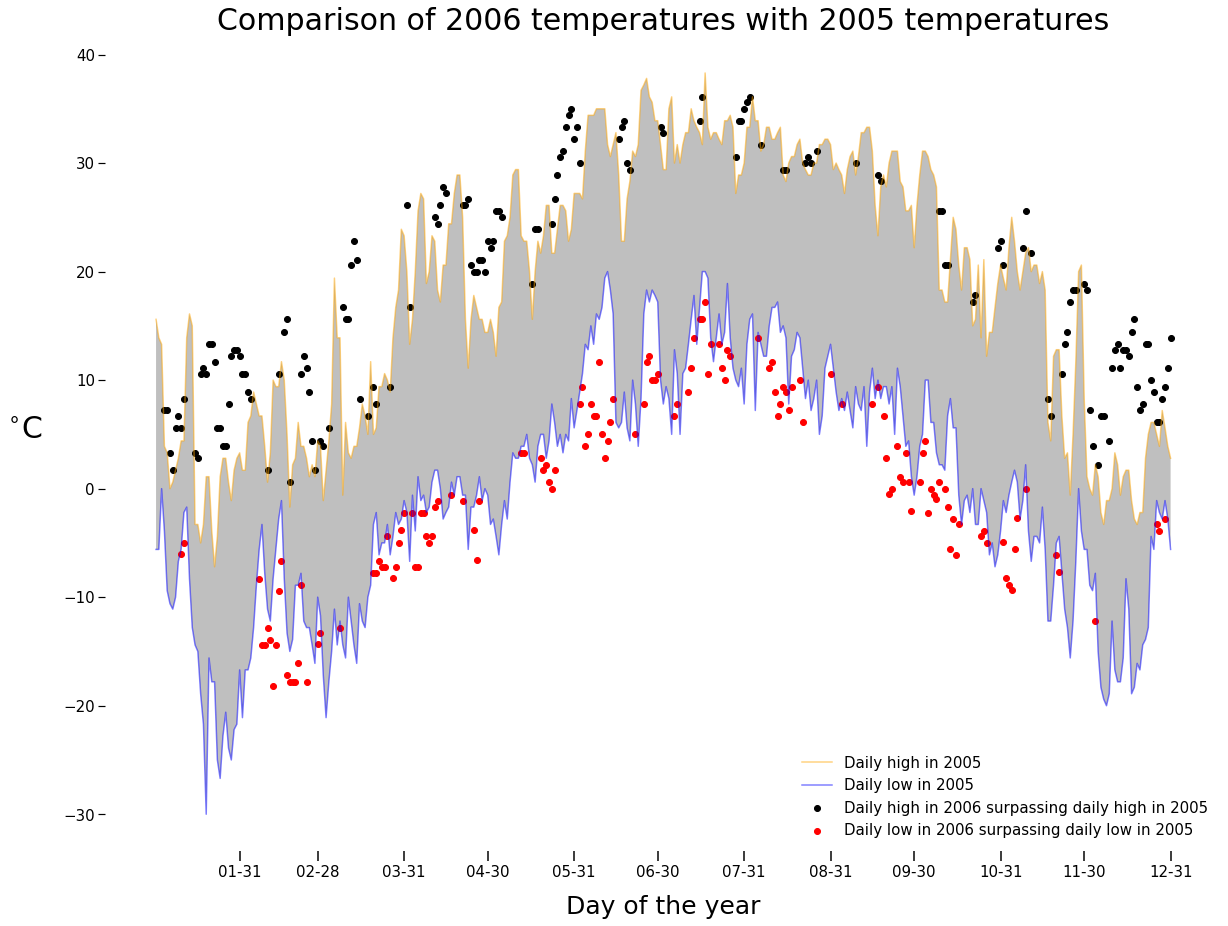

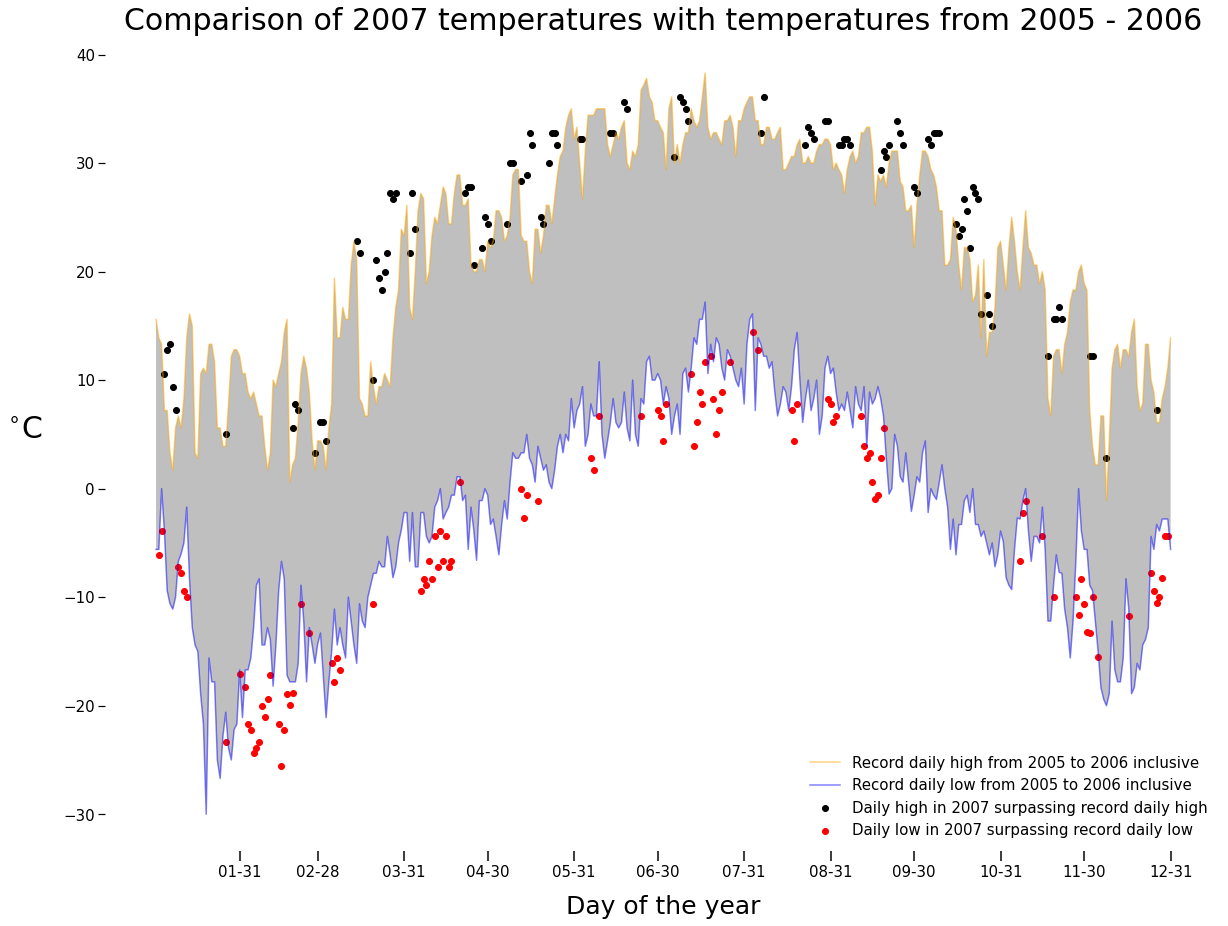

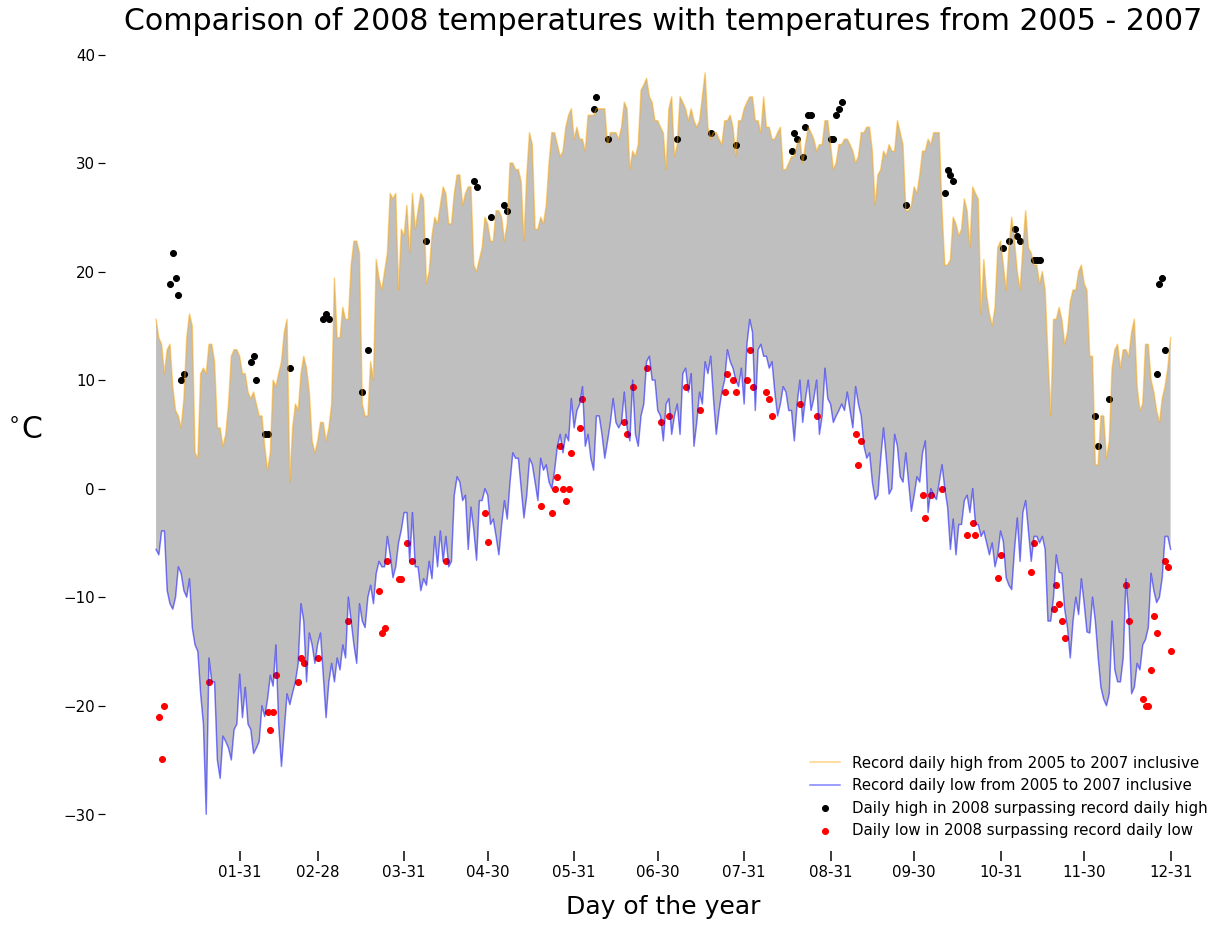

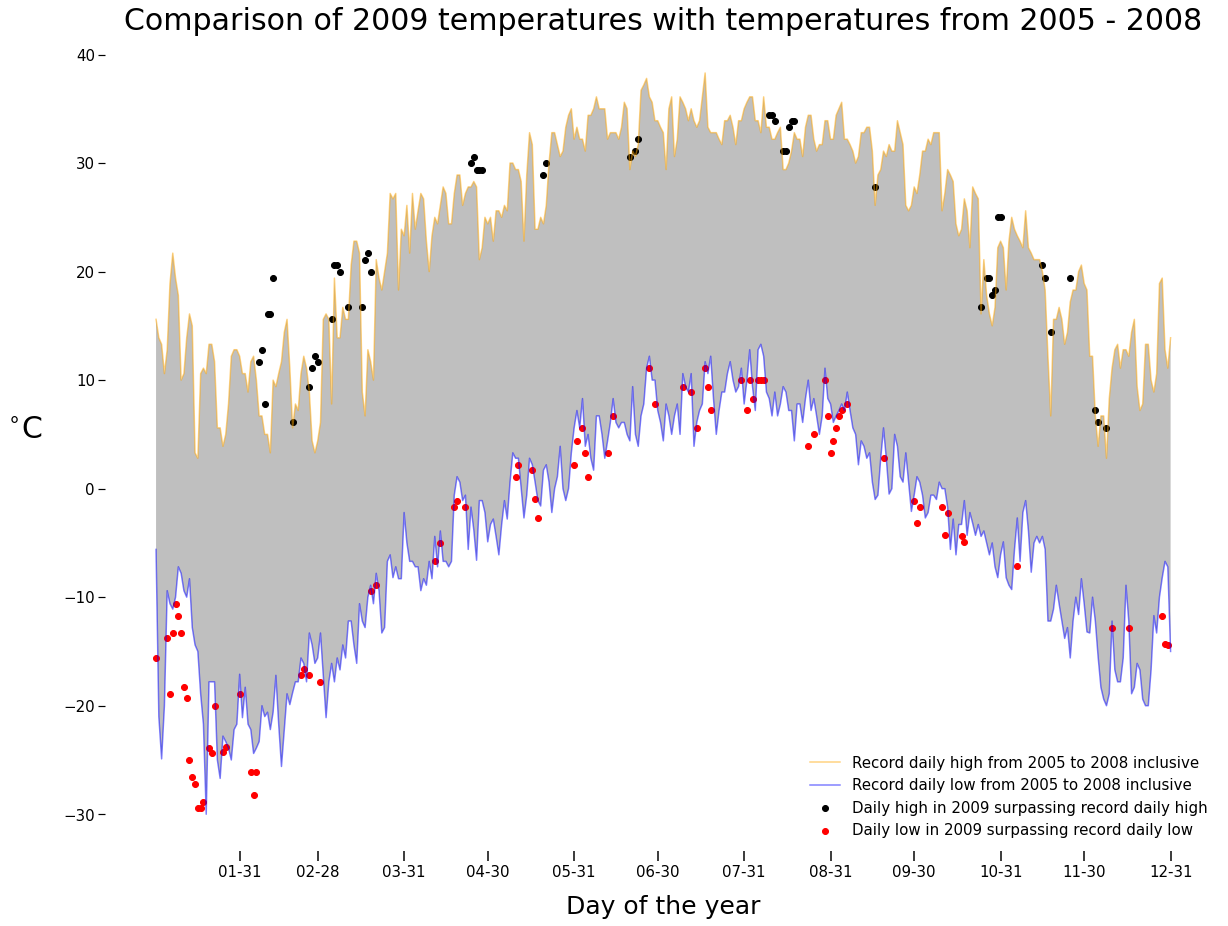

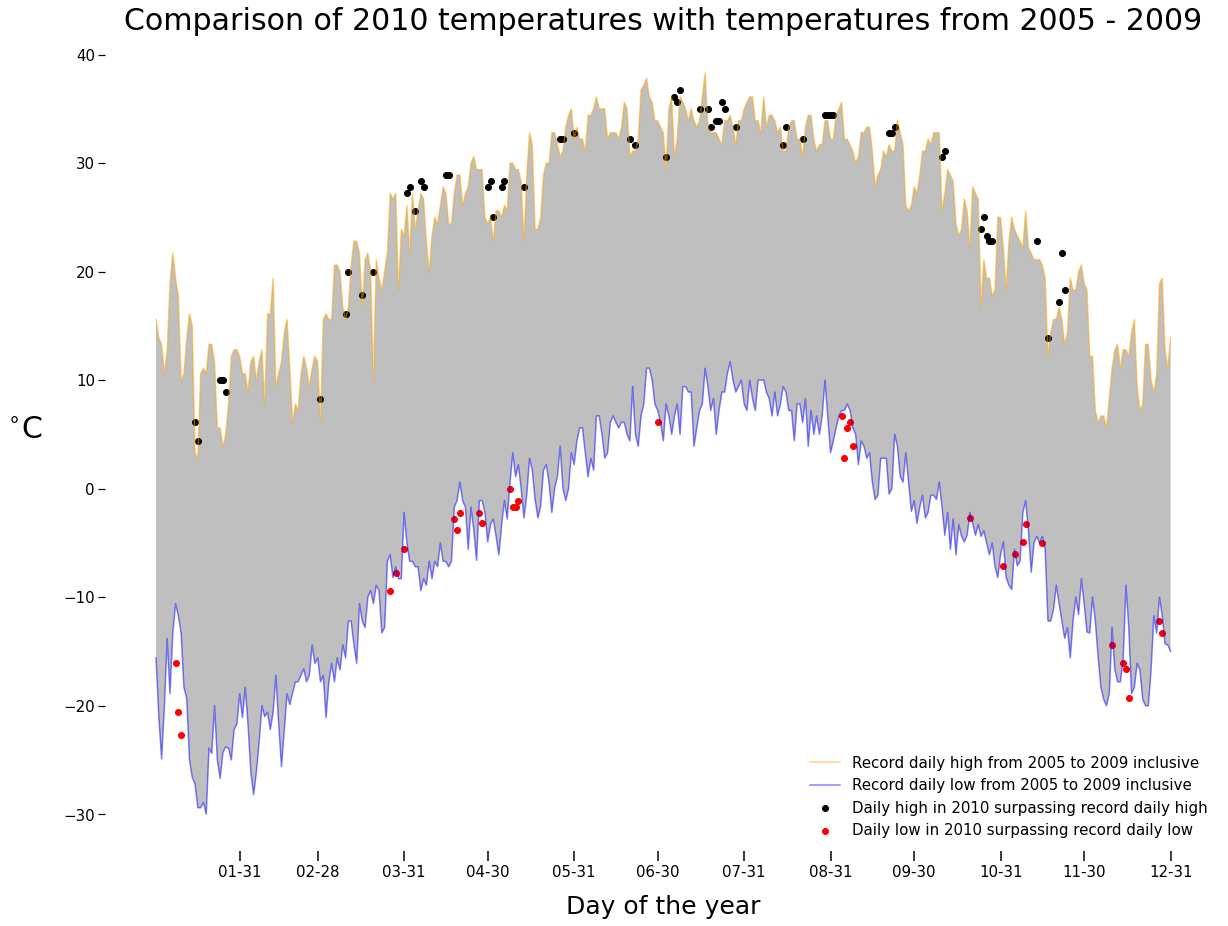

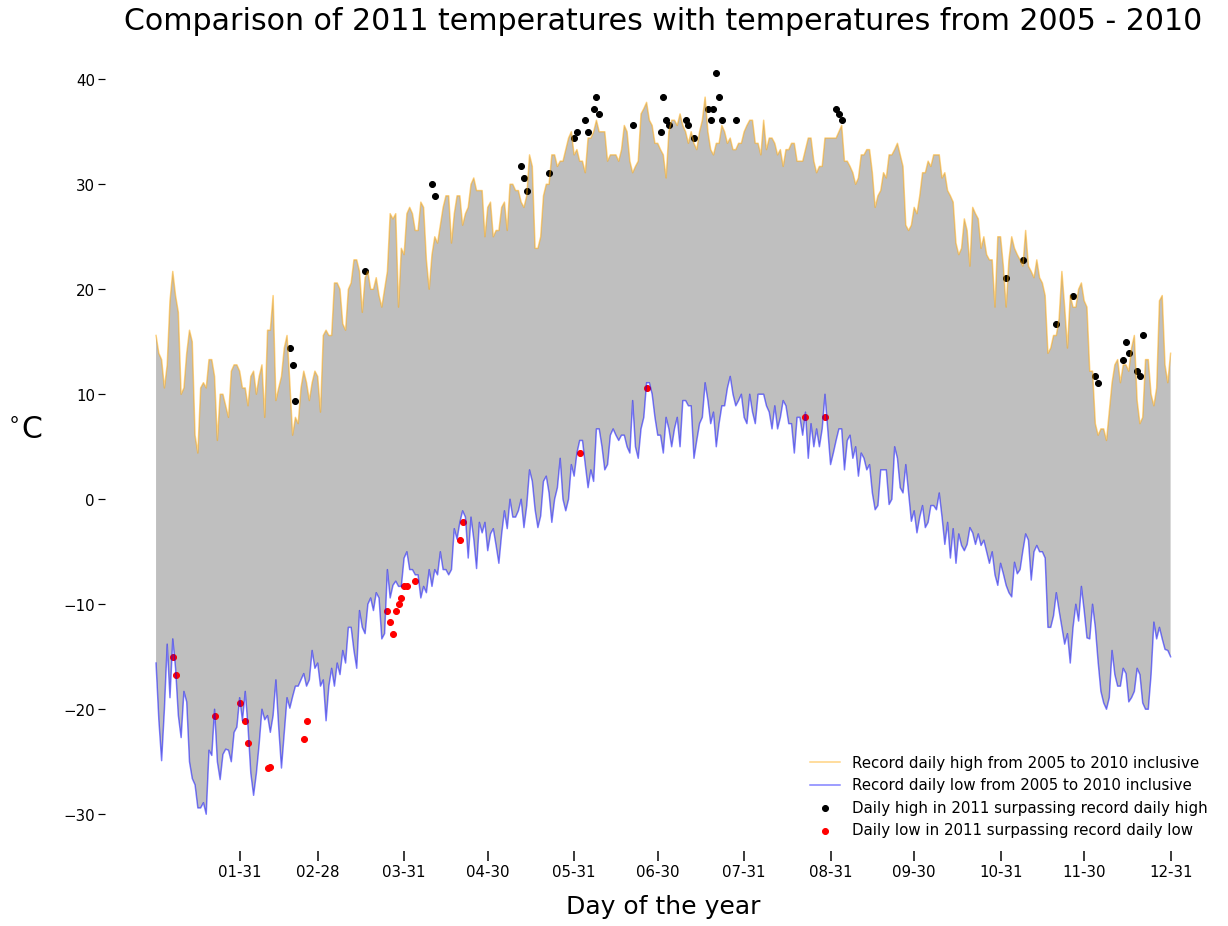

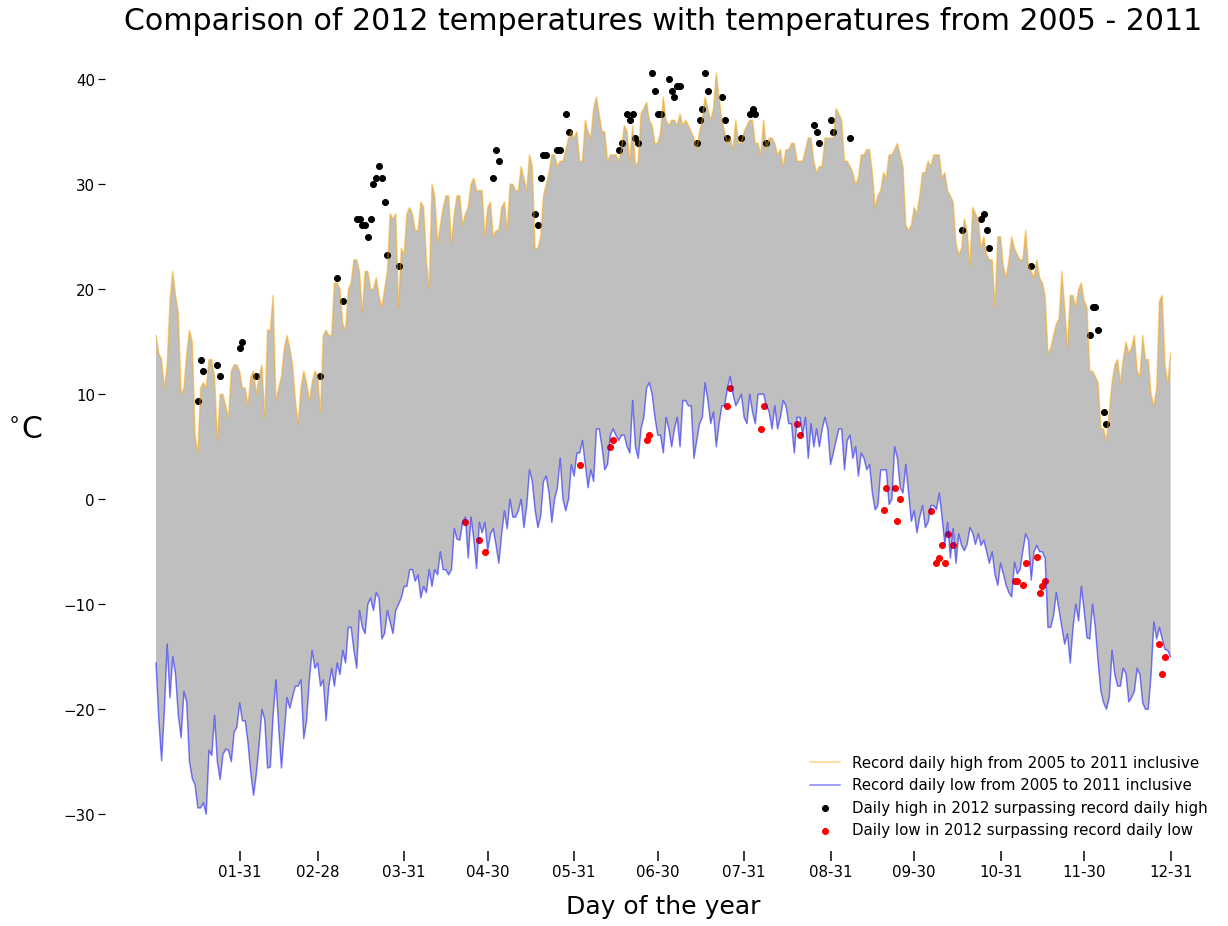

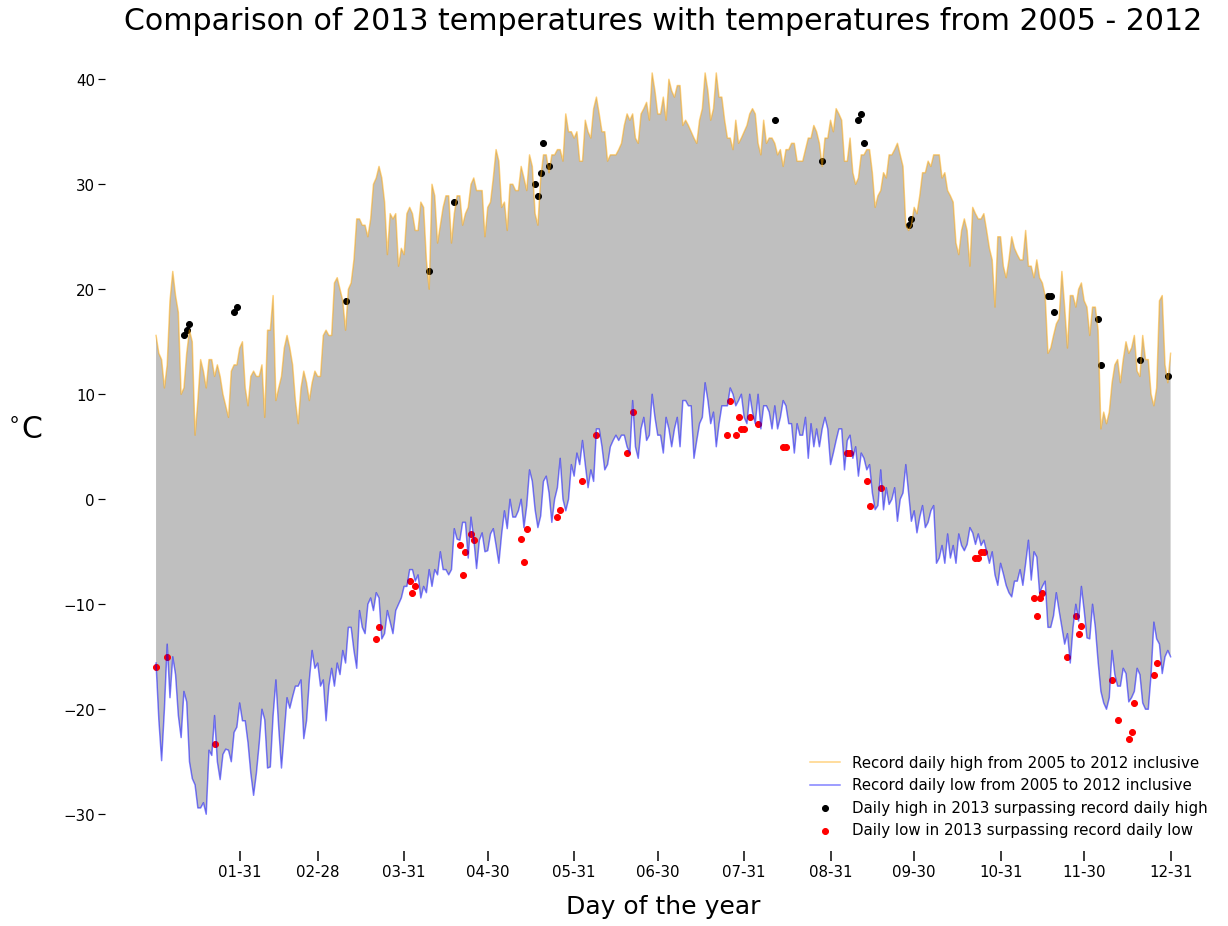

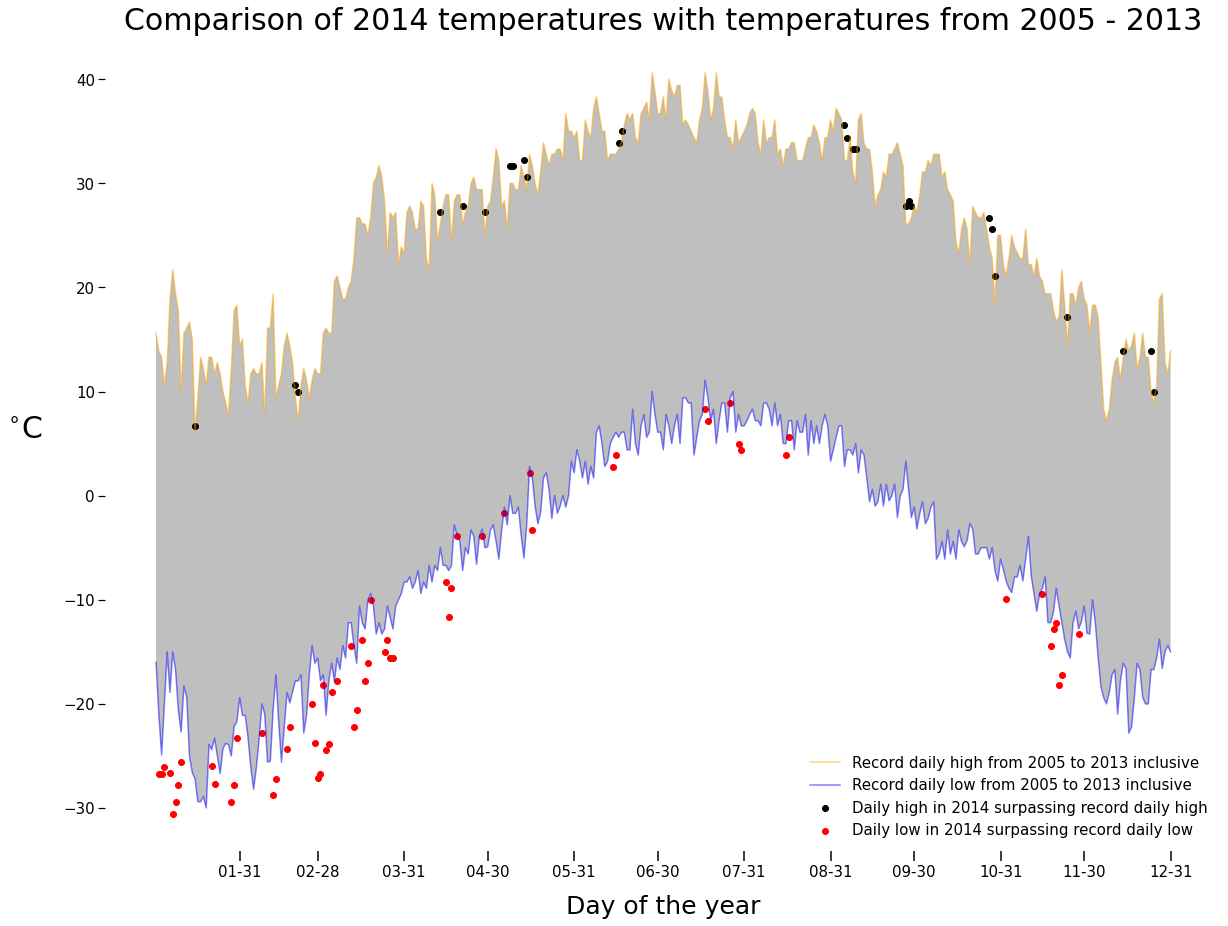

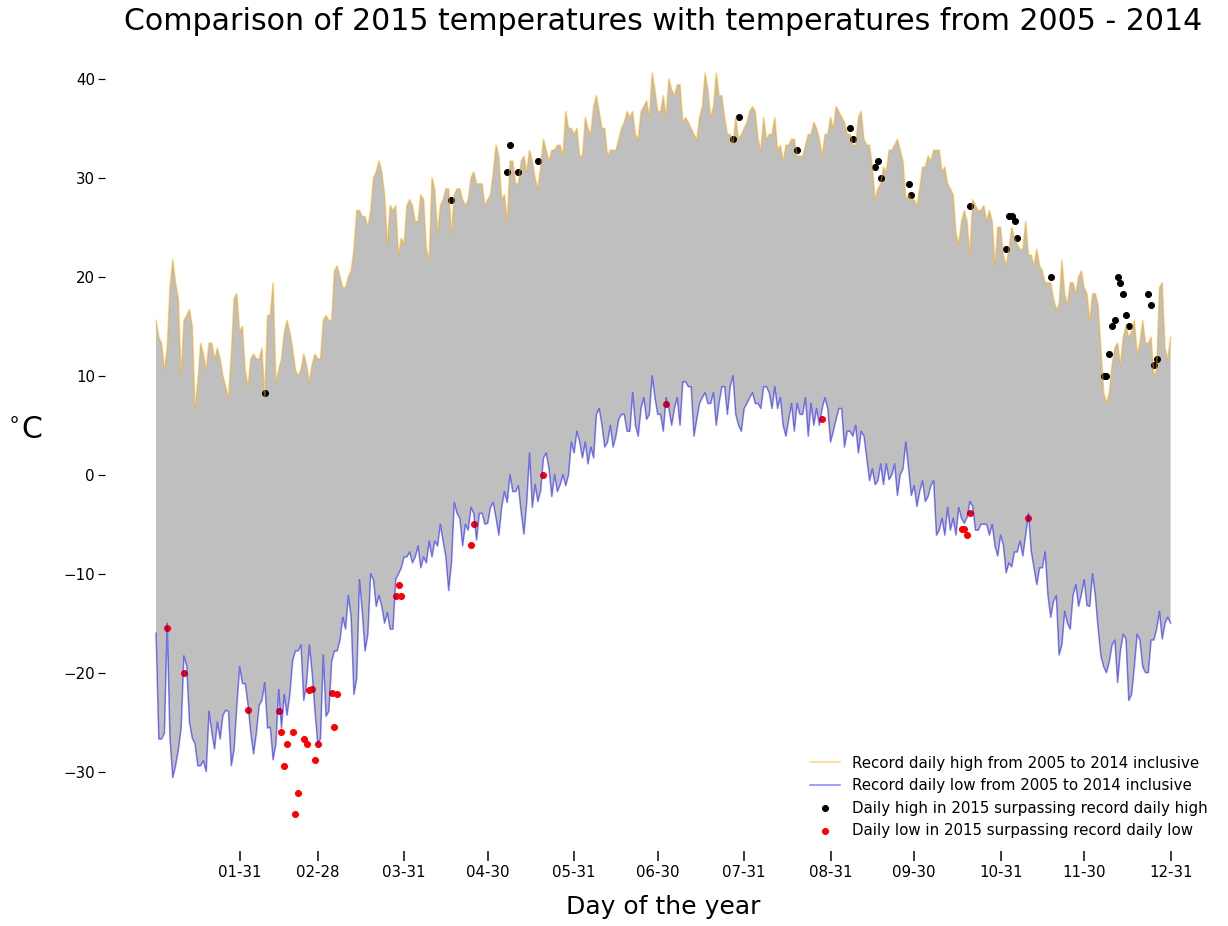

In [7]:
for year in range(2006, 2016):
    tmax, tmin, tmax_last, tmin_last = produce_dataframes(df, year)
    plot_dataframes(tmax, tmin, tmax_last, tmin_last, year)